In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
Diabetes=pd.read_csv('./diabetes.csv')
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Show Key Statistics
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Class Split
0    500
1    268
Name: Outcome, dtype: int64


Text(0, 0.5, 'Count')

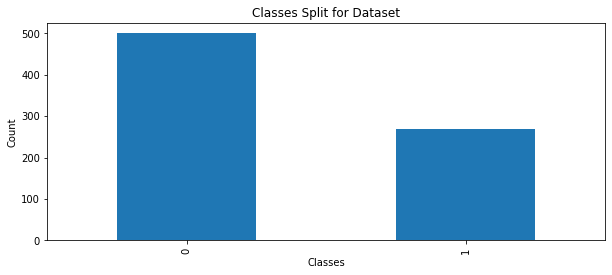

In [4]:
#Class Balance
print('Class Split')
print(Diabetes['Outcome'].value_counts())
Diabetes['Outcome'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

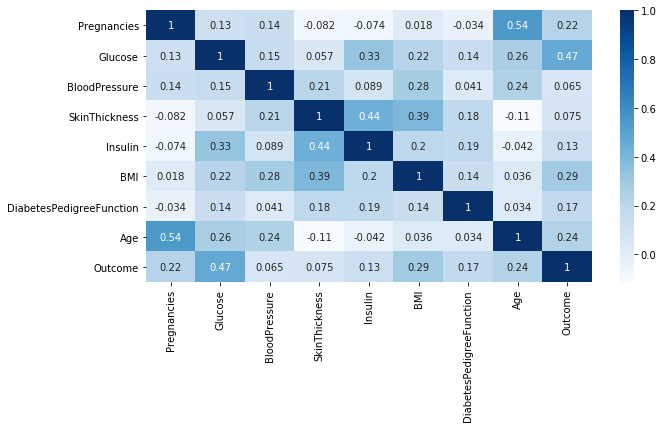

In [5]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(Diabetes.corr(),annot=True,cmap="Blues")

In [6]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(Diabetes,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: []


In [7]:
#Define x and y variable
x = Diabetes.drop('Outcome',axis=1).to_numpy()
y = Diabetes['Outcome'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)


Estimator: Logistic Regression
[0 1]
[-0.24915557]
[[ 0.42762734  1.07005672 -0.25043413  0.05708461 -0.18319575  0.73484151
   0.31717701  0.18433394]]
[[0.76116673 0.23883327]
 [0.74737818 0.25262182]
 [0.03081892 0.96918108]
 [0.6238541  0.3761459 ]
 [0.17965679 0.82034321]
 [0.38896575 0.61103425]
 [0.30372932 0.69627068]
 [0.93091193 0.06908807]
 [0.93212519 0.06787481]
 [0.38915687 0.61084313]
 [0.68444379 0.31555621]
 [0.82765583 0.17234417]
 [0.46656117 0.53343883]
 [0.81322732 0.18677268]
 [0.13786453 0.86213547]
 [0.13962266 0.86037734]
 [0.4845994  0.5154006 ]
 [0.53850246 0.46149754]
 [0.931873   0.068127  ]
 [0.80962326 0.19037674]
 [0.90982562 0.09017438]
 [0.65182275 0.34817725]
 [0.76515882 0.23484118]
 [0.2136194  0.7863806 ]
 [0.85038263 0.14961737]
 [0.69728381 0.30271619]
 [0.34809644 0.65190356]
 [0.96298268 0.03701732]
 [0.57839649 0.42160351]
 [0.22872555 0.77127445]
 [0.25744644 0.74255356]
 [0.09196306 0.90803694]
 [0.22521265 0.77478735]
 [0.61614042 0.383859

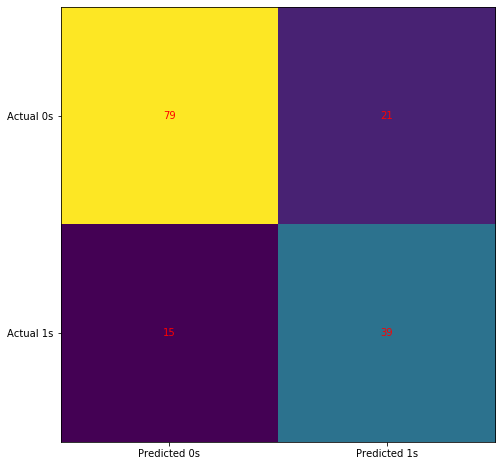

In [13]:
#Base Logistical Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  

for name,model in [('Logistic Regression', LogisticRegression(solver='lbfgs',class_weight='balanced',
                                               random_state=100))]: 
    model.fit(x_train2,y_train)
    print('\nEstimator: {}'.format(name)) 
    print(model.classes_)
    print(model.intercept_)
    print(model.coef_)
    print(model.predict_proba(x_test2))
    print(model.predict(x_test2))
    print(confusion_matrix(y_test, model.predict(x_test2)))

 
    
    cm = confusion_matrix(y_test, model.predict(x_test2))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
      